223414 train records
234 valid records
uint8


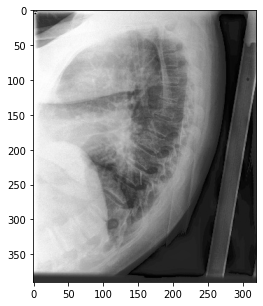

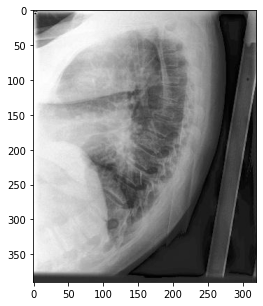

                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN     

(<keras.preprocessing.image.DataFrameIterator at 0x7f7c235b7400>,
 <keras.preprocessing.image.DataFrameIterator at 0x7f7c3f2d3040>)

In [15]:
i = 103243

# target image size
image_size = 224

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
import alphabet
from keras.preprocessing import image as image_pre

def get_chexpert(aug_indx, artifact):

    labels = ['No Finding',
            'Enlarged Cardiomediastinum',
        'Cardiomegaly',
        'Lung Opacity',
        'Lung Lesion',
        'Edema',
        'Consolidation',
        'Pneumonia',
        'Atelectasis',
        'Pneumothorax', 
        'Pleural Effusion',
        'Pleural Other',
        'Fracture',
        'Support Devices'
    ]

    home = str(Path.home())
    data_path = f'{home}/tensorflow_datasets/downloads/manual/'

    train_df = pd.read_csv(f'{data_path}CheXpert-v1.0-small/train.csv')
    valid_df = pd.read_csv(f'{data_path}CheXpert-v1.0-small/valid.csv')

    print(len(train_df), 'train records')
    print(len(valid_df), 'valid records')

    # get the image for augmentation
    path_key = 'Path'
    path = train_df.iloc[aug_indx][path_key]
    path = data_path + path
    # load it
    image = Image.open(path)
    data = asarray(image)

    print(data.dtype)

    # get the unique feature and add it to the image
    data[1:6, 1:6] = artifact * 255

    # show the image
    ims = 20
    plt.figure(figsize=(ims, ims))
    plt.imshow(data, cmap='binary_r')
    plt.show()

    # update the dataframe with the path for the augmented image
    aug_path = path.replace('.jpg', '_aug.jpg')
    train_df.at[i, path_key] = aug_path

    # save the image under the augmented image path
    aug_image = Image.fromarray(data)
    aug_image.save(aug_path)

    # test: read it from the new path and show it
    img = Image.open(train_df.iloc[i][path_key])
    plt.figure(figsize=(ims, ims))
    plt.imshow(img, cmap='binary_r')
    plt.show()

    def feature_string(row):
        feature_list = []
        for feature in labels:
            if row[feature] == 1:
                feature_list.append(feature)
                
        return ';'.join(feature_list)

    train_df['feature_string'] = train_df.apply(feature_string,axis = 1).fillna('')
    train_df['feature_string'] = train_df['feature_string'] .apply(lambda x:x.split(";"))
    valid_df['feature_string'] = valid_df.apply(feature_string,axis = 1).fillna('')
    valid_df['feature_string'] = valid_df['feature_string'] .apply(lambda x:x.split(";"))

    print(train_df[train_df['feature_string'] == ''])

    train_datagen = image_pre.ImageDataGenerator(rescale=1./255)
    valid_datagen = image_pre.ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                directory=data_path, 
                                                x_col="Path", y_col="feature_string",
                                                seed = 42,
                                                classes = labels,
                                                class_mode="categorical",
                                                target_size=(image_size,image_size),
                                                #batch_size=32,
                                                subset = "training")

    valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid_df,
                                                directory=data_path, 
                                                x_col="Path", y_col="feature_string",
                                                seed = 42,
                                                classes = labels,
                                                class_mode="categorical",
                                                target_size=(image_size,image_size),
                                                #batch_size=batch_size,
                                                subset = "training")

    datasets = train_generator, valid_generator

    return datasets

def get_chexpert_binary(aug_indx, artifact):


    labels = [
        'Normal',
        'Not Normal'
    ]

    not_normal_labels = [
        'Enlarged Cardiomediastinum',
        'Cardiomegaly',
        'Lung Opacity',
        'Lung Lesion',
        'Edema',
        'Consolidation',
        'Pneumonia',
        'Atelectasis',
        'Pneumothorax', 
        'Pleural Effusion',
        'Pleural Other',
        'Fracture'
    ]

    home = str(Path.home())
    data_path = f'{home}/tensorflow_datasets/downloads/manual/'

    train_df = pd.read_csv(f'{data_path}CheXpert-v1.0-small/train.csv')
    valid_df = pd.read_csv(f'{data_path}CheXpert-v1.0-small/valid.csv')

    print(len(train_df), 'train records')
    print(len(valid_df), 'valid records')

    # get the image for augmentation
    path_key = 'Path'
    path = train_df.iloc[aug_indx][path_key]
    path = data_path + path
    # load it
    image = Image.open(path)
    data = asarray(image)

    print(data.dtype)

    # get the unique feature and add it to the image
    data[1:6, 1:6] = artifact * 255

    # show the image
    ims = 5
    plt.figure(figsize=(ims, ims))
    plt.imshow(data, cmap='binary_r')
    plt.show()

    # update the dataframe with the path for the augmented image
    aug_path = path.replace('.jpg', '_aug.jpg')
    train_df.at[i, path_key] = aug_path

    # save the image under the augmented image path
    aug_image = Image.fromarray(data)
    aug_image.save(aug_path)

    # test: read it from the new path and show it
    img = Image.open(train_df.iloc[i][path_key])
    plt.figure(figsize=(ims, ims))
    plt.imshow(img, cmap='binary_r')
    plt.show()

    def feature_string(row):
        for feature in not_normal_labels:
            if row[feature] == 1:
                return 'Not Normal'
        return 'Normal'

    train_df['feature_string'] = train_df.apply(feature_string,axis = 1).fillna('')
    valid_df['feature_string'] = valid_df.apply(feature_string,axis = 1).fillna('')

    print(train_df.head())

    train_datagen = image_pre.ImageDataGenerator(rescale=1./255)
    valid_datagen = image_pre.ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                directory=data_path, 
                                                x_col="Path", y_col="feature_string",
                                                seed = 42,
                                                classes = labels,
                                                class_mode="categorical",
                                                target_size=(image_size,image_size),
                                                #batch_size=32,
                                                subset = "training")

    valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid_df,
                                                directory=data_path, 
                                                x_col="Path", y_col="feature_string",
                                                seed = 42,
                                                classes = labels,
                                                class_mode="categorical",
                                                target_size=(image_size,image_size),
                                                #batch_size=batch_size,
                                                subset = "training")

    datasets = train_generator, valid_generator

    return datasets


get_chexpert_binary(1123, alphabet.alphabet[0])
